# What the model will predict
The goal is to develop a model which is designed to predict the stress levels of students based on a comprehensive set of input features.It's a valuable approach for understanding the underlying causes of student stress and their impact on well-being.It will categorize the students stress level based on various 

In [1]:
# Setup plotting
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex5 import *

In [2]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [3]:
#Reading dataset
df = pd.read_csv('/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv')

In [4]:
#Data visualization
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [6]:
df.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [7]:
X = df.copy().dropna()
y = X.pop('stress_level')

features_num = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying']


In [8]:
#Data pre-processing
preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
)

In [9]:
#spliting the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9598)

In [10]:
# Convert labels to categorical format
from keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)


In [11]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

input_shape = [X_train.shape[1]]

In [12]:
from keras.utils import plot_model

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax'),
])

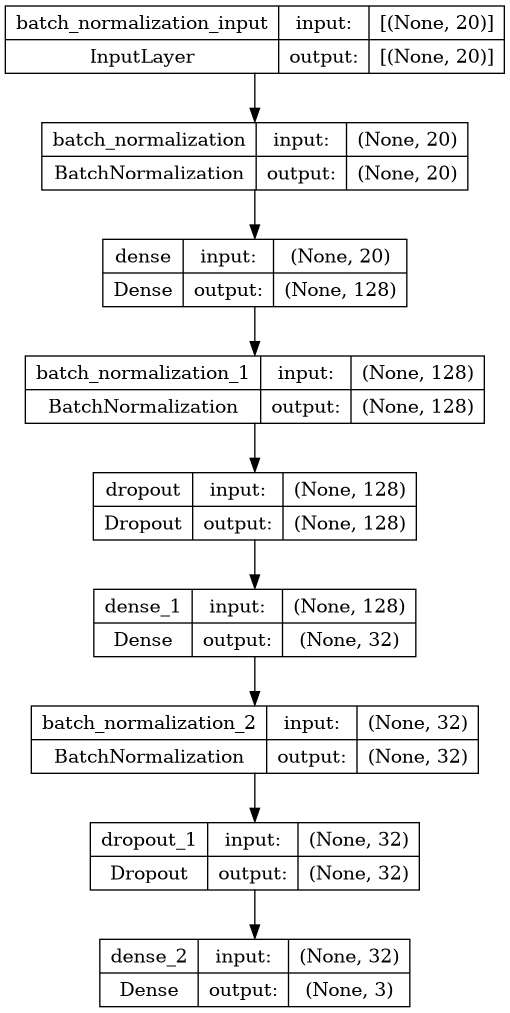

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical crossentropy for multiclass classification
    metrics=['accuracy'],  # Use 'accuracy' for multiclass classification
)

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Input Layer:
The Batch Normalization layer helps in normalizing the input by adjusting and scaling the activations. It helps the model learn more efficiently.

# Hidden Layers:
Dense Layer 1 (**128 neurons, ReLU activation**): This layer has 64 neurons, each applying a Rectified Linear Unit (ReLU) activation function. This helps introduce non-linearity to the model, allowing it to learn complex patterns in the data. Batch Normalization: Similar to the input layer, this layer normalizes the activations, helping in the efficient training of the model. Dropout (30%): Dropout is a regularization technique that randomly sets 30% of the input units to zero during training. This helps prevent overfitting. Dense Layer 2 (32 neurons, ReLU activation): Another dense layer with 32 neurons and ReLU activation, providing additional capacity for learning intricate patterns. Batch Normalization: Similar to previous layers, this normalizes the activations. Dropout (30%): Another dropout layer to further prevent overfitting.

# Output Layer:
Dense Layer (**3 neurons, Softmax activation**): The final layer consists of three neurons, each representing one of your target classes (low,medium and high). The softmax activation function is used here, transforming the network's output into probability scores for each class. The class with the highest probability is the predicted class.

Epoch 1/200
2/2 [==============================] - 2s 342ms/step - loss: 1.8992 - accuracy: 0.2836 - val_loss: 1.1421 - val_accuracy: 0.3564
Epoch 2/200
2/2 [==============================] - 0s 39ms/step - loss: 1.4982 - accuracy: 0.3891 - val_loss: 1.0125 - val_accuracy: 0.3600
Epoch 3/200
2/2 [==============================] - 0s 40ms/step - loss: 1.0366 - accuracy: 0.5709 - val_loss: 0.9037 - val_accuracy: 0.3636
Epoch 4/200
2/2 [==============================] - 0s 38ms/step - loss: 0.8744 - accuracy: 0.6642 - val_loss: 0.8137 - val_accuracy: 0.4691
Epoch 5/200
2/2 [==============================] - 0s 41ms/step - loss: 0.6988 - accuracy: 0.7539 - val_loss: 0.7401 - val_accuracy: 0.6582
Epoch 6/200
2/2 [==============================] - 0s 42ms/step - loss: 0.5462 - accuracy: 0.8364 - val_loss: 0.6781 - val_accuracy: 0.7200
Epoch 7/200
2/2 [==============================] - 0s 43ms/step - loss: 0.4929 - accuracy: 0.8521 - val_loss: 0.6267 - val_accuracy: 0.7600
Epoch 8/200
2/2 [==

<Axes: title={'center': 'Accuracy'}>

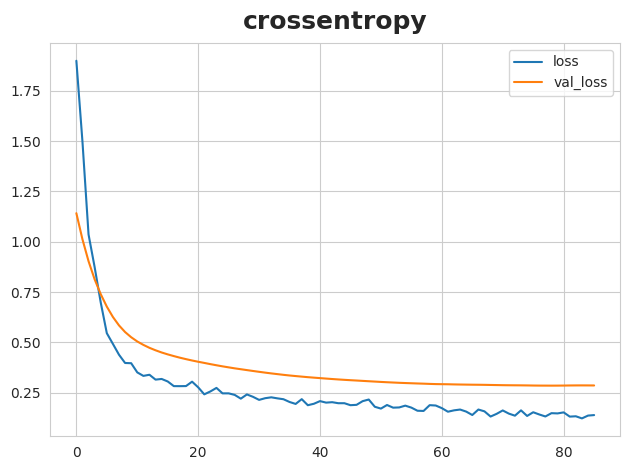

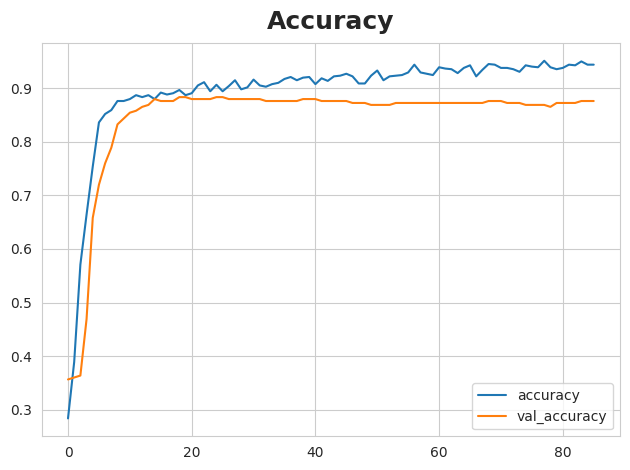

In [14]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train_categorical,
    validation_data=(X_test, y_test_categorical),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="crossentropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")